Когда имеется дело с датасетом, содержащим временные ряды, обработка пропущенных значений становится важным этапом анализа данных. Ниже приведены методы заполнения пропущенных значений в таких датасетах:

1. **Mean imputation (Заполнение средним значением):**
   - **Описание:** Этот метод заключается в заполнении пропущенных значений средним или средневзвешенным значением временного ряда.
   - **Преимущества:** Прост в реализации, не требует сложных вычислений.
   - **Недостатки:** Может исказить динамику данных, особенно если в ряду есть сезонность или тренд.

2. **Linear interpolation (Линейная интерполяция):**
   - **Описание:** Интерполяция используется для оценки пропущенных значений на основе линейной зависимости соседних значений. 
   - **Преимущества:** Сохраняет тренд и сезонность данных, подходит для непрерывных временных рядов.
   - **Недостатки:** Может быть неэффективен при наличии больших колебаний данных.

3. **Seasonal decomposition of time series (Сезонное декомпонирование временного ряда):**
   - **Описание:** Разбивает временной ряд на тренд, сезонность и остатки. Затем можно заполнять пропущенные значения на основе этих компонент.
   - **Преимущества:** Учет сезонных колебаний и тренда.
   - **Недостатки:** Требует более сложной обработки, может потребовать более сложных моделей.

4. **Moving averages (Скользящие средние):**
   - **Описание:** Использует скользящие средние для оценки пропущенных значений на основе средних значений в окне.
   - **Преимущества:** Сглаживает шумы, сохраняя общий тренд.
   - **Недостатки:** Может привести к смещению данных, особенно если данные подвержены большим колебаниям.

5. **Модели прогнозирования временных рядов:**
   - **Описание:** Можно использовать модели прогнозирования, такие как ARIMA, SARIMA, или нейронные сети, для предсказания пропущенных значений.
   - **Преимущества:** Учет сложных закономерностей данных.
   - **Недостатки:** Требует больше вычислительных ресурсов и времени.

Выбор метода зависит от конкретной ситуации, структуры данных и характера временного ряда. Часто эффективнее всего применять комбинацию различных методов для получения наилучших результатов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Datasets/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
data = data.rename(columns={"#Passengers": "Passengers"}, inplace=False)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Построим график временного ряда

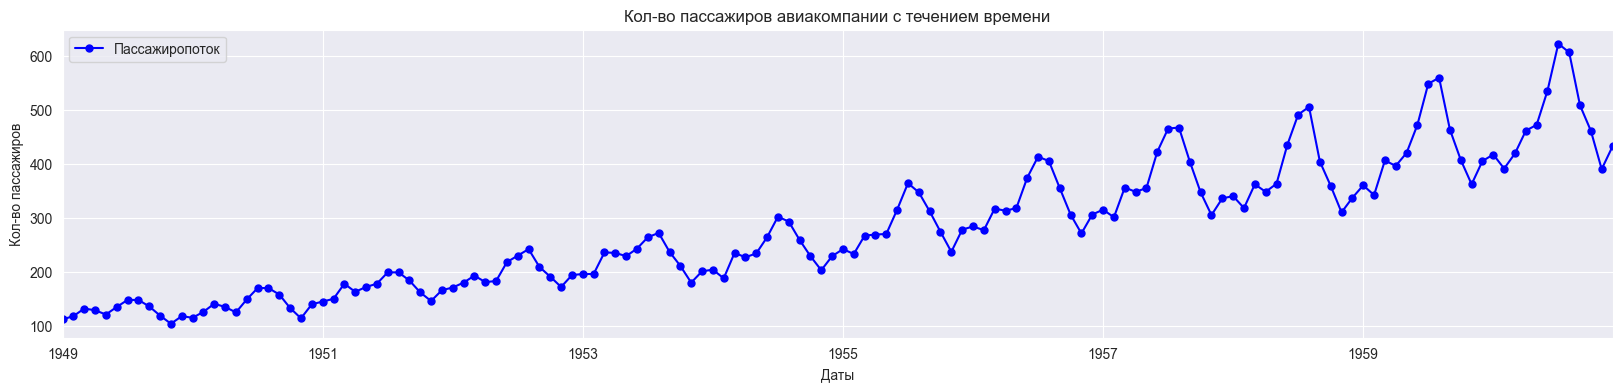

In [4]:
data.plot(y='Passengers', figsize=(20, 4), color='blue', linestyle='-', marker='o', markersize=5,
          label='Пассажиропоток')
plt.grid(True)
plt.legend(loc='best')
plt.title('Кол-во пассажиров авиакомпании с течением времени')
plt.xlabel('Даты')
plt.ylabel('Кол-во пассажиров')
plt.show(block=False)

# Обработаем пропущенные значения

## Mean imputation (внесем вместо пропусков средние значения)

In [6]:
data['Passengers_Mean_Imputation'] = data['Passengers'].fillna(data['Passengers'].mean())

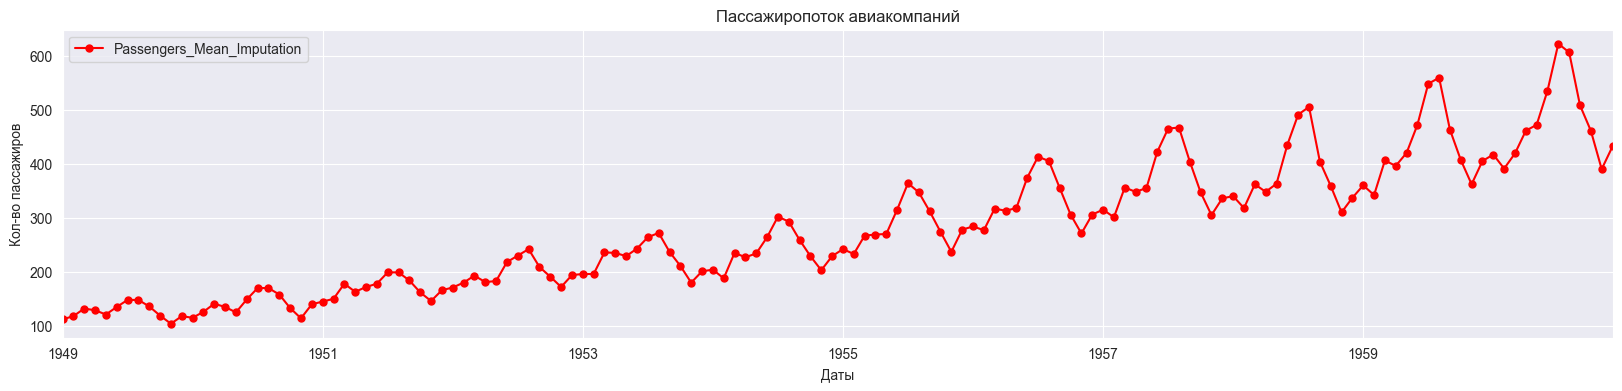

In [7]:
data[['Passengers_Mean_Imputation']].plot(figsize=(20, 4), grid=True, legend=True, color='red', linestyle='-',
                                          marker='o', markersize=5)
plt.title('Пассажиропоток авиакомпаний')
plt.xlabel('Даты')
plt.ylabel('Кол-во пассажиров')
plt.show(block=False)

## Линейная интерполяция

In [8]:
data['Passengers_Linear_Interpolation'] = data['Passengers'].interpolate(method='linear')

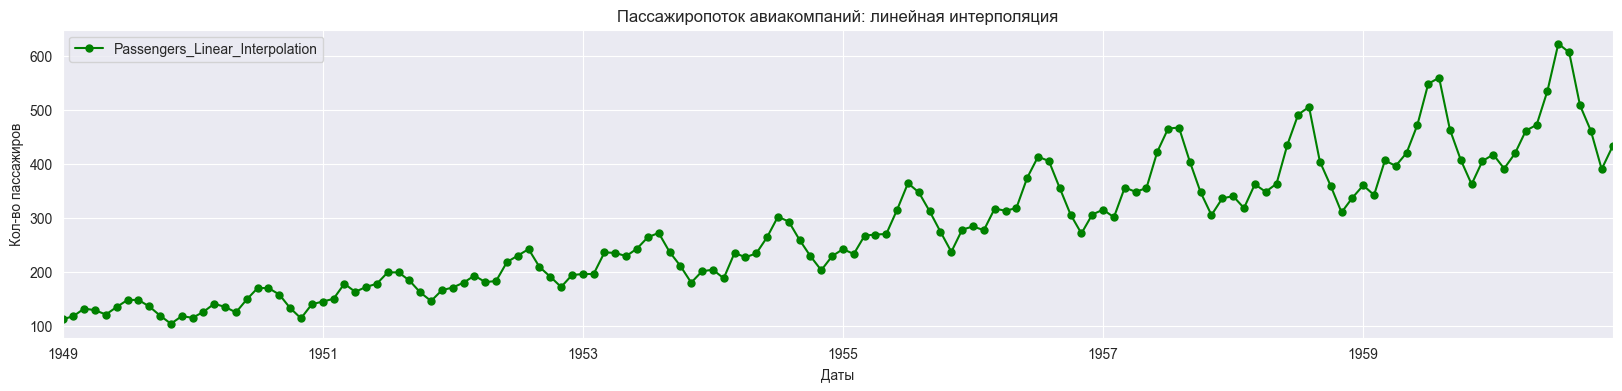

In [9]:
data[['Passengers_Linear_Interpolation']].plot(figsize=(20, 4), grid=True, legend=True, color='green', linestyle='-',
                                               marker='o', markersize=5)
plt.title('Пассажиропоток авиакомпаний: линейная интерполяция')
plt.xlabel('Даты')
plt.ylabel('Кол-во пассажиров')
plt.show(block=False)

In [10]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1949-01-01,112,112,112
1949-02-01,118,118,118
1949-03-01,132,132,132
1949-04-01,129,129,129
1949-05-01,121,121,121


In [11]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation', 'Passengers_Linear_Interpolation'], inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Обнаружение выбросов

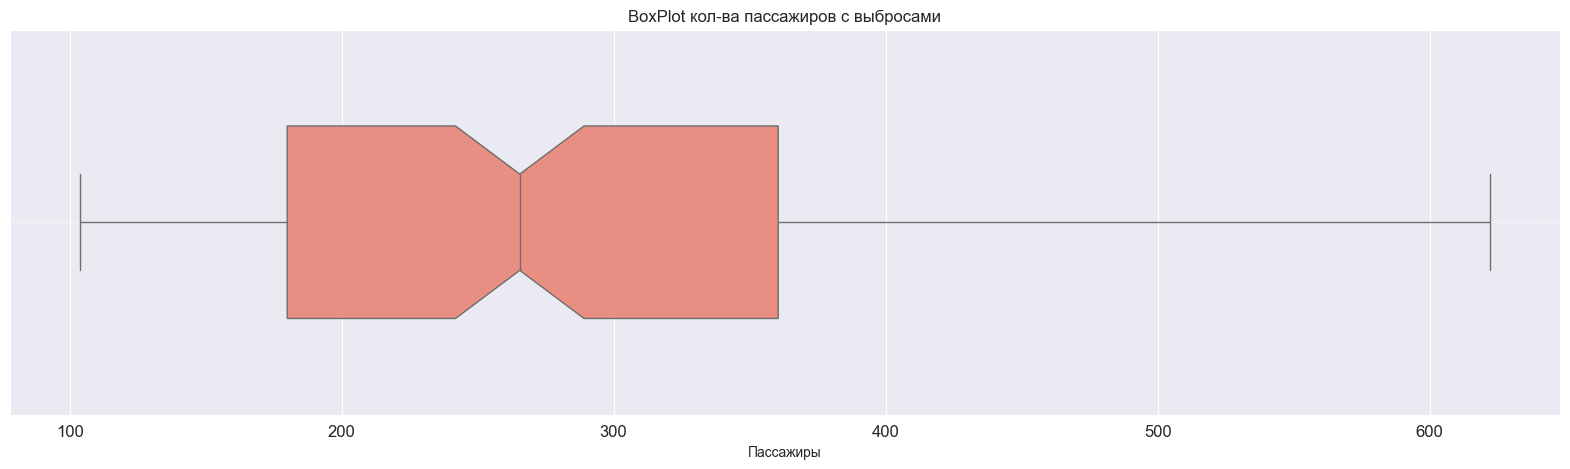

In [12]:
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.boxplot(x=data['Passengers'], color='salmon', width=0.5, notch=True)
plt.title('BoxPlot кол-ва пассажиров с выбросами')
plt.xlabel('Пассажиры')
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Гистограмма

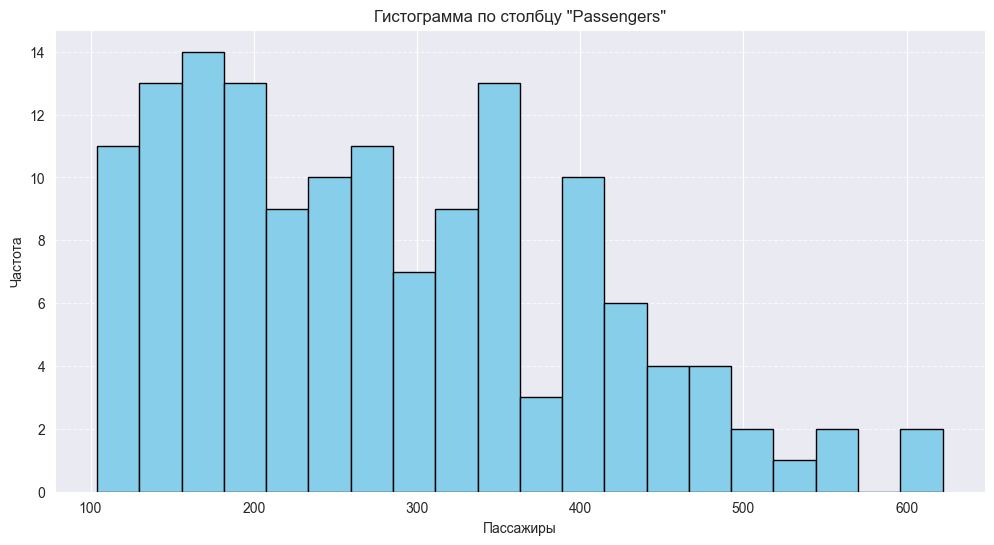

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(data['Passengers'], bins=20, color='skyblue', edgecolor='black')

plt.title('Гистограмма по столбцу "Passengers"')
plt.xlabel('Пассажиры')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Разложение временного ряда

## Аддитивное сезонное разложение

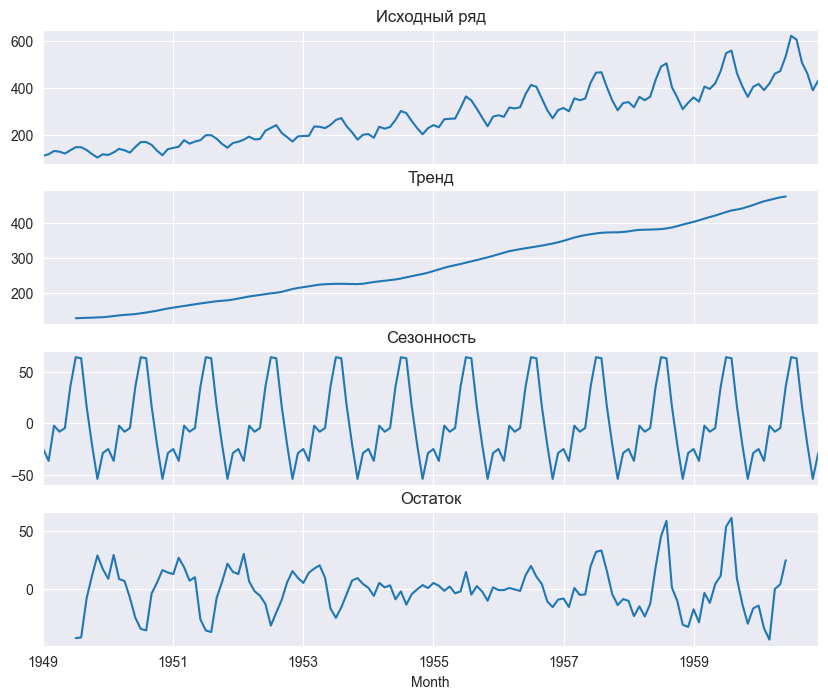

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data['Passengers'], model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Исходный ряд')
result.trend.plot(ax=ax2, title='Тренд')
result.seasonal.plot(ax=ax3, title='Сезонность')
result.resid.plot(ax=ax4, title='Остаток')

plt.show()

## Мультипликативная сезонная декомпозиция

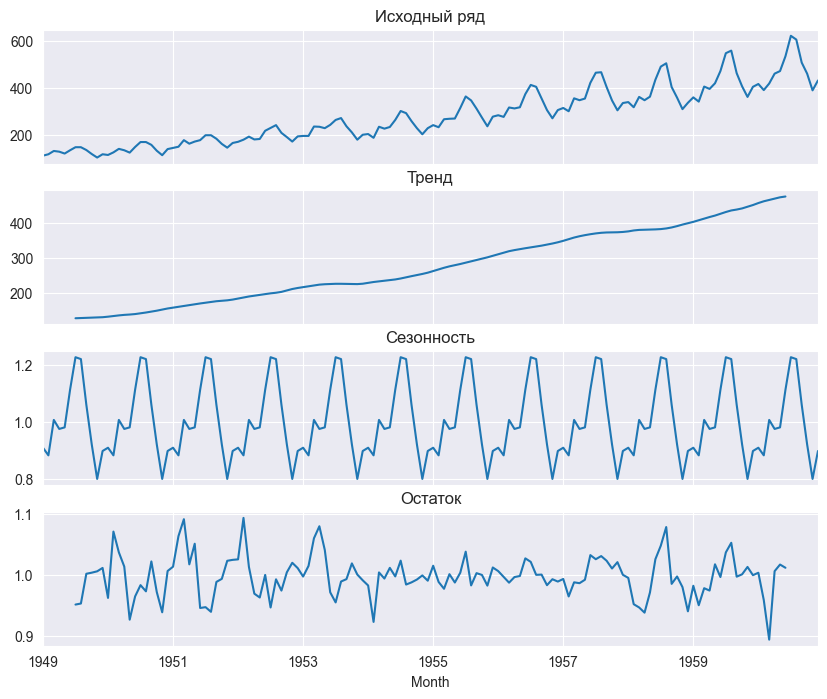

In [15]:
result = seasonal_decompose(data['Passengers'], model='multiplicative')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Исходный ряд')
result.trend.plot(ax=ax2, title='Тренд')
result.seasonal.plot(ax=ax3, title='Сезонность')
result.resid.plot(ax=ax4, title='Остаток')

plt.show()

# Построение и оценка прогноза временного ряда

## Разделить данные временных рядов на обучающий и тестовый наборы

In [16]:
train_len = 120
train = data[:train_len]  # Первые 120 месяцев - обучающая выборка
test = data[train_len:]  # Остальные 24 месяца - тестовая выборка

# Простые методы прогнозироования временных рядов

## Наивный метод

In [17]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'].iloc[-1]

### Построим график (тестовая выборка и прогноз)

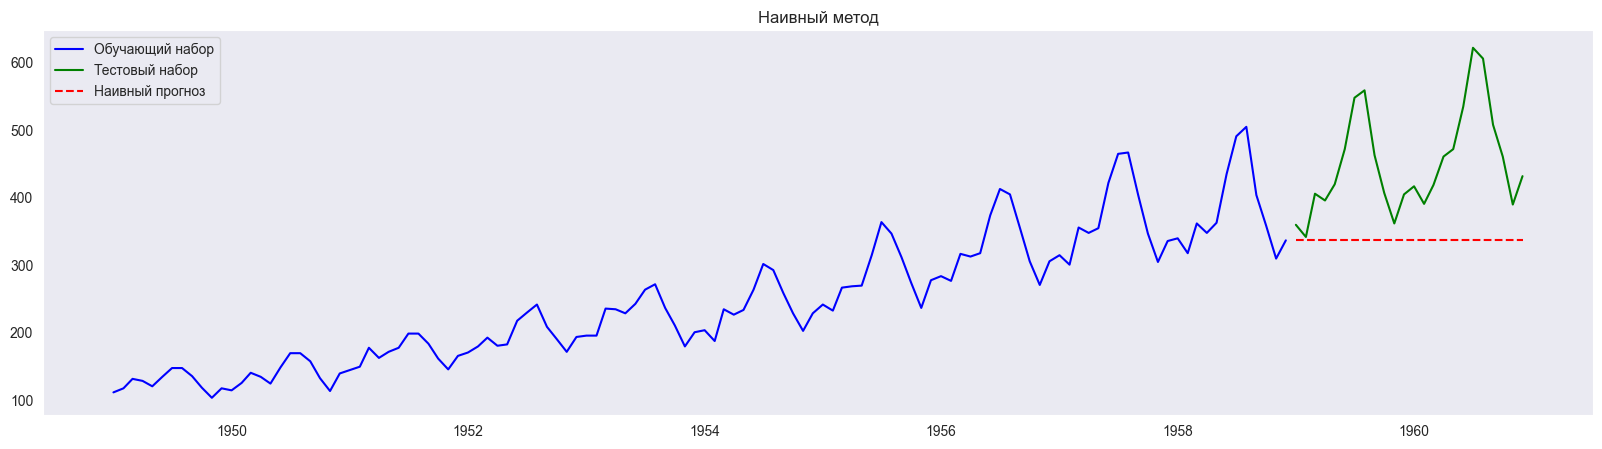

In [18]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Обучающий набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_naive['naive_forecast'], label='Наивный прогноз', linestyle='--', color='red')
plt.legend(loc='best')
plt.title('Наивный метод')
plt.show()

# Высчитаем RMSE и MAPE

In [19]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_naive['naive_forecast']) / test['Passengers']) * 100, 2)

In [20]:
results = pd.DataFrame({'Method': ['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58


## Метод простого усреднения

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

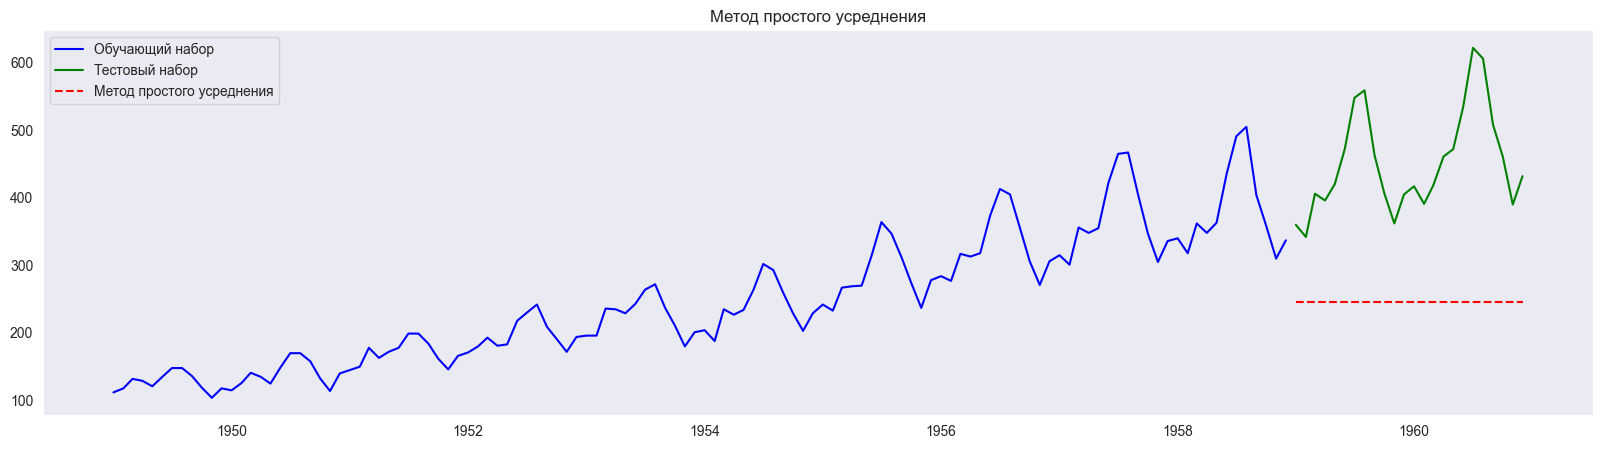

In [23]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Обучающий набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_avg['avg_forecast'], label='Метод простого усреднения', linestyle='--', color='red')
plt.legend(loc='best')
plt.title('Метод простого усреднения')
plt.show()

# Высчитаем RMSE и MAPE

In [24]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_avg['avg_forecast']) / test['Passengers']) * 100, 2)

In [25]:
tempResults = pd.DataFrame({'Method': ['Simple average method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
0,Simple average method,219.44,44.23


## Метод простого скользящего среднего

In [26]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()

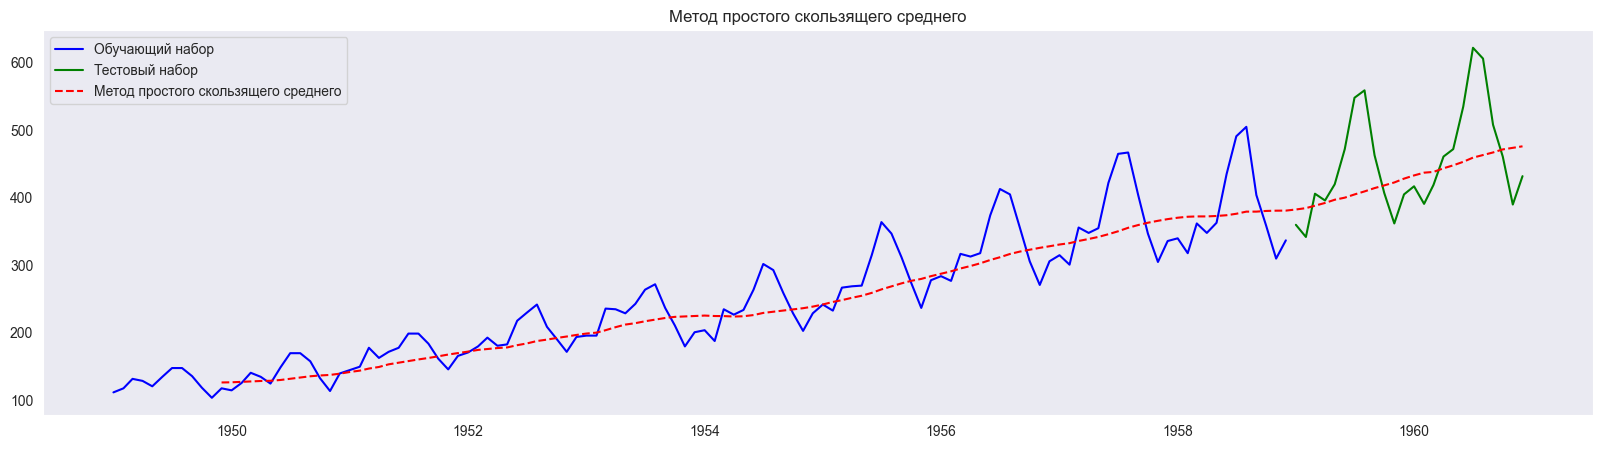

In [27]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Обучающий набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_sma['sma_forecast'], label='Метод простого скользящего среднего', linestyle='--', color='red')
plt.legend(loc='best')
plt.title('Метод простого скользящего среднего')
plt.show()

# Высчитаем RMSE и MAPE

In [28]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'][train_len:]) / test['Passengers']) * 100, 2)

In [29]:
tempResults = pd.DataFrame({'Method': ['Simple moving average forecast'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.33,23.58
0,Simple average method,219.44,44.23
0,Simple moving average forecast,72.40,11.23
